# **2 - EDA**

In [298]:
# Import the required libraries.
import sys
import os
sys.path.append(os.path.abspath("../src"))
import util

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Load Config
---

In [299]:
# Load the configuration file.
config = util.load_config()

## 1. Load Train Data
---

In [300]:
X_train.sample(10)

,Patient_ID,Age,Gender,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
6191,6192,56,Male,4.202935,Occipital,Glioblastoma,I,Vision Issues,Nausea,Headache,Yes,No,Yes,41.133123,1.324471,Yes,Negative,Yes
10305,10306,63,Female,3.957507,Temporal,Astrocytoma,I,Vision Issues,Vision Issues,Nausea,Yes,No,No,56.775906,1.086140,No,Negative,Yes
6374,6375,67,Male,8.878632,Frontal,Glioblastoma,II,Headache,Headache,Nausea,No,Yes,No,80.487966,2.534630,No,Negative,No
15167,15168,78,Male,5.620697,Occipital,Astrocytoma,I,Vision Issues,Headache,Headache,No,Yes,Yes,79.907852,0.228246,Yes,Negative,Yes
11142,11143,77,Female,8.290105,Frontal,Glioblastoma,IV,Seizures,Seizures,Headache,Yes,Yes,No,53.323281,0.411500,Yes,Negative,Yes
17175,17176,35,Male,0.840920,Frontal,Astrocytoma,I,Headache,Headache,Vision Issues,No,Yes,Yes,78.621630,2.370304,No,Positive,Yes
6528,6529,54,Female,1.019623,Frontal,Medulloblastoma,II,Vision Issues,Vision Issues,Vision Issues,Yes,No,No,60.521087,0.638597,Yes,Negative,No
14591,14592,78,Male,1.488554,Occipital,Astrocytoma,II,Nausea,Headache,Nausea,No,No,No,80.267603,0.918680,Yes,Negative,No
12389,12390,40,Female,6.898074,Parietal,Meningioma,III,Seizures,Vision Issues,Nausea,No,Yes,No,98.604715,1.413081,Yes,Negative,Yes
12308,12309,27,Female,2.069265,Parietal,Meningioma,III,Seizures,Vision Issues,Seizures,Yes,No,No,44.646353,1.580382,Yes,Negative,Yes


In [301]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 19881 to 14591
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           16000 non-null  int64  
 1   Age                  16000 non-null  int64  
 2   Gender               16000 non-null  object 
 3   Tumor_Size           16000 non-null  float64
 4   Location             16000 non-null  object 
 5   Histology            16000 non-null  object 
 6   Stage                16000 non-null  object 
 7   Symptom_1            16000 non-null  object 
 8   Symptom_2            16000 non-null  object 
 9   Symptom_3            16000 non-null  object 
 10  Radiation_Treatment  16000 non-null  object 
 11  Surgery_Performed    16000 non-null  object 
 12  Chemotherapy         16000 non-null  object 
 13  Survival_Rate        16000 non-null  float64
 14  Tumor_Growth_Rate    16000 non-null  float64
 15  Family_History       16000 non-null  

In [302]:
X_train.describe()

,Patient_ID,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate
count,16000.000000,16000.00000,16000.000000,16000.000000,16000.000000
mean,10014.565813,49.41975,5.214678,70.095336,1.546926
std,5773.094930,17.41003,2.755902,17.273182,0.835417
min,1.000000,20.00000,0.500599,40.002386,0.100820
25%,5036.750000,34.00000,2.803852,55.177281,0.832310
50%,10038.500000,49.00000,5.166046,70.235417,1.541899
75%,14994.250000,65.00000,7.600040,85.018780,2.261490
max,20000.000000,79.00000,9.999420,99.998125,2.999804


**Data Cleaning**

In [303]:
X_train.isna().sum() / len(X_train) * 100

Patient_ID             0.0
Age                    0.0
Gender                 0.0
Tumor_Size             0.0
Location               0.0
Histology              0.0
Stage                  0.0
Symptom_1              0.0
Symptom_2              0.0
Symptom_3              0.0
Radiation_Treatment    0.0
Surgery_Performed      0.0
Chemotherapy           0.0
Survival_Rate          0.0
Tumor_Growth_Rate      0.0
Family_History         0.0
MRI_Result             0.0
Follow_Up_Required     0.0
dtype: float64

In [304]:
X_train.duplicated().sum()

np.int64(0)

In [305]:
df_plot = X_train.drop('Patient_ID', axis=1)

In [306]:
# Sanity check the X_train.
X_train.head()

,Age,Gender,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
Patient_ID,,,,,,,,,,,,,,,,,
19882,50,Male,7.544846,Parietal,Glioblastoma,II,Nausea,Seizures,Nausea,No,No,No,55.441331,2.380341,No,Negative,Yes
17741,46,Male,1.450586,Temporal,Medulloblastoma,II,Nausea,Vision Issues,Headache,No,No,No,67.185624,1.248645,Yes,Negative,No
5362,30,Female,1.108693,Parietal,Medulloblastoma,IV,Seizures,Vision Issues,Seizures,No,Yes,Yes,50.656056,2.621739,Yes,Positive,Yes
12736,38,Female,4.576600,Occipital,Meningioma,IV,Seizures,Nausea,Vision Issues,Yes,Yes,Yes,78.252317,1.696516,Yes,Positive,No
16231,57,Male,3.043994,Parietal,Astrocytoma,I,Nausea,Seizures,Seizures,Yes,No,Yes,84.844266,1.760073,Yes,Negative,Yes


In [5]:
# Sanity check the y_train.
y_train.head()

Patient_ID
19882       Benign
17741       Benign
5362        Benign
12736       Benign
16231    Malignant
Name: Tumor_Type, dtype: object

In [6]:
df_plot_data = pd.DataFrame(df_plot)
y_train_data = pd.Series(y_train)

df_plot = df_plot_data.copy()
df_plot['Diagnosis'] = y_train_data

print("DataFrame Gabungan untuk Plotting:")
df_plot

,Age,Gender,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required,Tumor_Type
Patient_ID,,,,,,,,,,,,,,,,,,
19882,50,Male,7.544846,Parietal,Glioblastoma,II,Nausea,Seizures,Nausea,No,No,No,55.441331,2.380341,No,Negative,Yes,Benign
17741,46,Male,1.450586,Temporal,Medulloblastoma,II,Nausea,Vision Issues,Headache,No,No,No,67.185624,1.248645,Yes,Negative,No,Benign
5362,30,Female,1.108693,Parietal,Medulloblastoma,IV,Seizures,Vision Issues,Seizures,No,Yes,Yes,50.656056,2.621739,Yes,Positive,Yes,Benign
12736,38,Female,4.576600,Occipital,Meningioma,IV,Seizures,Nausea,Vision Issues,Yes,Yes,Yes,78.252317,1.696516,Yes,Positive,No,Benign
16231,57,Male,3.043994,Parietal,Astrocytoma,I,Nausea,Seizures,Seizures,Yes,No,Yes,84.844266,1.760073,Yes,Negative,Yes,Malignant


<Axes: xlabel='count', ylabel='Diagnosis'>

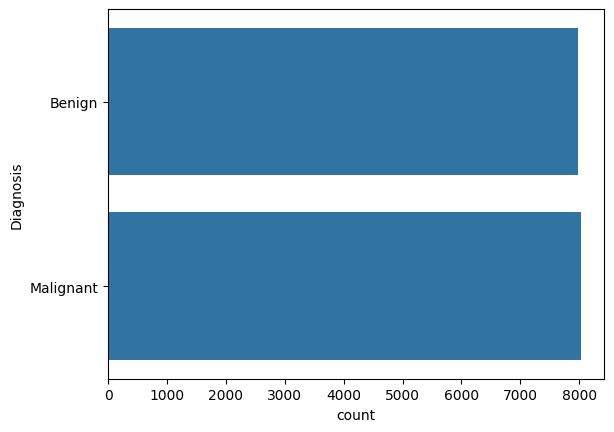

In [386]:
sns.countplot(df_plot["Diagnosis"])

## Viasualisasi Fitur Numerik

Text(0.5, 1.0, 'Age hist')

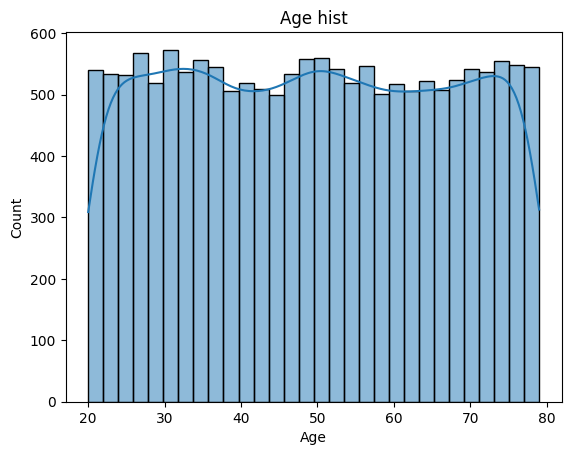

In [307]:
plt.Figure(figsize=(12,20))
sns.histplot(df_plot["Age"],bins= 30, kde= True)
plt.title("Age hist")

In [308]:
grouped_age = [0, 20, 30, 50, 70, 100]  
labels = ['Child/teens', 'Young Adult', 'Adult', 'Senior', 'Elderly']

df_plot['Age_Group'] = pd.cut(df_plot['Age'], bins=grouped_age, labels=labels)

<Axes: title={'center': 'Age grouped'}, xlabel='count', ylabel='Age_Group'>

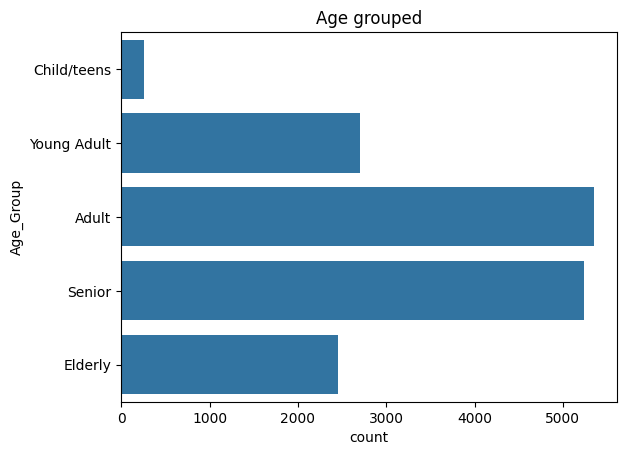

In [309]:
plt.title("Age grouped")
sns.countplot(df_plot['Age_Group'])


# Brain Tumor Size Categories (based on neurosurgical literature)

| **Category** | **Diameter (cm)** | **Notes** |
|--------------|-------------------|-----------|
| Small        | < 2 cm            | Often incidental, may cause no symptoms. |
| Medium       | 2 – 3 cm          | Symptoms may start depending on location. |
| Large        | > 3 – 4.5 cm      | Often symptomatic, pressure effects more likely. |
| Giant        | ≥ 5 cm            | Common cutoff for “giant meningioma” in most studies. |
| Very Giant   | ≥ 7 cm            | Rare, but reported; causes severe mass effect. |

---

📌 **Key points:**
- WHO **grade ≠ size** (biology determines grade).
- **≥ 5 cm** is the most common definition of *giant meningioma*.
- **≥ 7 cm** is sometimes called *very giant* in case reports.
- Size matters for **surgery & symptoms**, not for grading.



In [310]:


size_tumor = [0,2,3,5,7,100]
tumor_label = ["small","medium","large","Giant","very Giant"]

df_plot["Tumor_size_grouped"] = pd.cut(df_plot["Tumor_Size"],labels=tumor_label,bins=size_tumor)

<Axes: title={'center': 'Tumor size grouped'}, xlabel='count', ylabel='Tumor_size_grouped'>

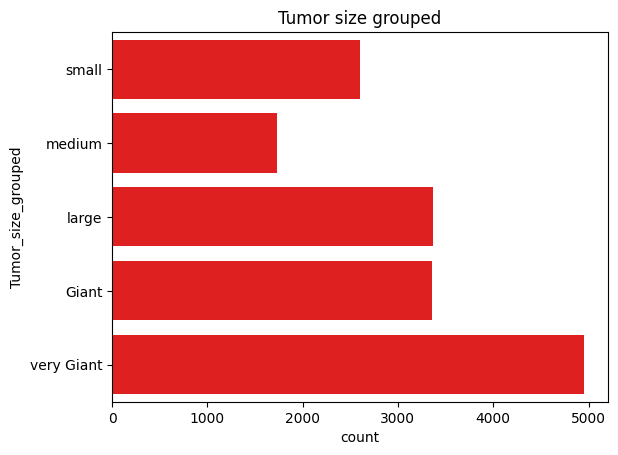

In [311]:
plt.title("Tumor size grouped")
sns.countplot(df_plot['Tumor_size_grouped'], color="red")

In [389]:
df_plot.groupby('Diagnosis')["Tumor_Size"].mean()

Diagnosis
Benign       5.245480
Malignant    5.184059
Name: Tumor_Size, dtype: float64

<Axes: title={'center': 'Age vs tumor size'}, xlabel='Age', ylabel='Tumor_Size'>

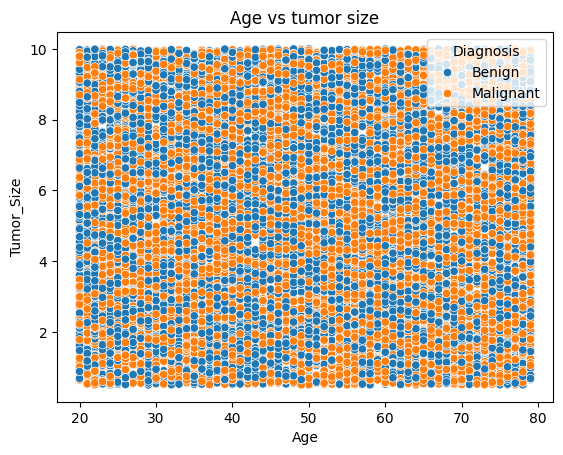

In [396]:
plt.title("Age vs tumor size")
sns.scatterplot(df_plot,x="Age",y = "Tumor_Size", hue="Diagnosis")

Text(0.5, 1.0, 'Box plot for tumor size')

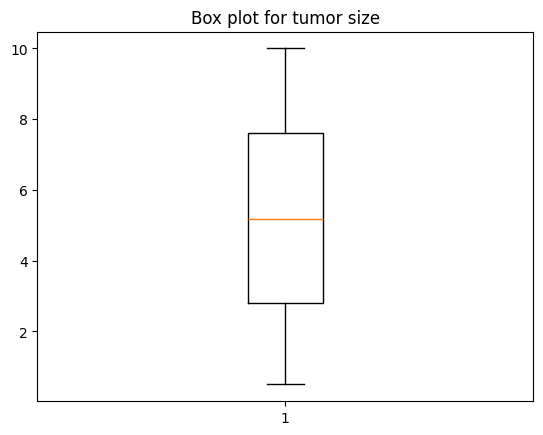

In [312]:
plt.boxplot(df_plot["Tumor_Size"])
plt.title("Box plot for tumor size")

In [313]:
Surivival_rate = [0,25,50,75,100]
labels_survival = ["low","moderetly low", "moderetly high", "high"]

df_plot["Survival_rate_Group"] = pd.cut(df_plot["Survival_Rate"], labels=labels_survival,bins=Surivival_rate)

{'whiskers': [<matplotlib.lines.Line2D at 0x19adec67610>,
 'caps': [<matplotlib.lines.Line2D at 0x19adec67890>,
 'boxes': [<matplotlib.lines.Line2D at 0x19adec674d0>],
 'medians': [<matplotlib.lines.Line2D at 0x19adec67b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x19adec67c50>],
 'means': []}

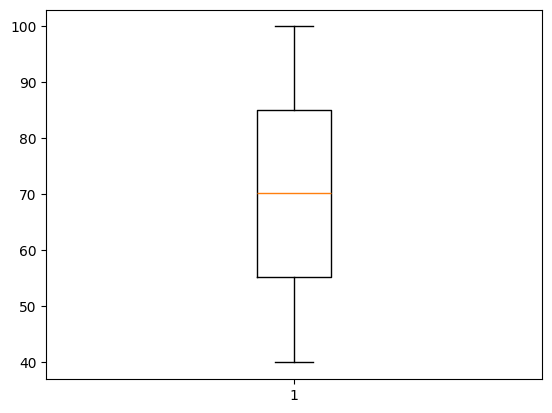

In [314]:
plt.boxplot(df_plot["Survival_Rate"])

<Axes: xlabel='count', ylabel='Survival_rate_Group'>

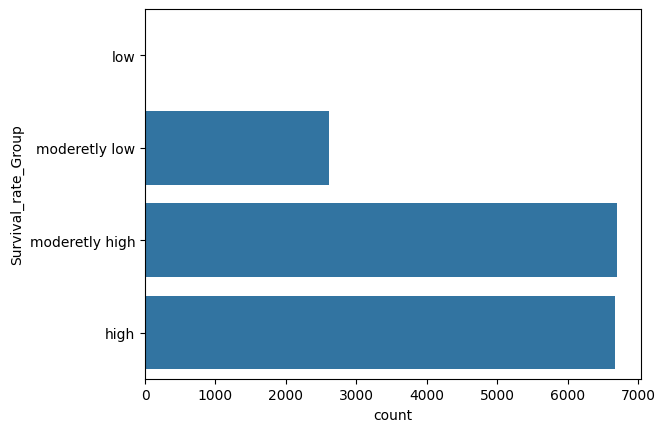

In [315]:
sns.countplot(df_plot["Survival_rate_Group"])

<Axes: title={'center': 'Survival_Rate vs tumor size'}, xlabel='Survival_Rate', ylabel='Tumor_Size'>

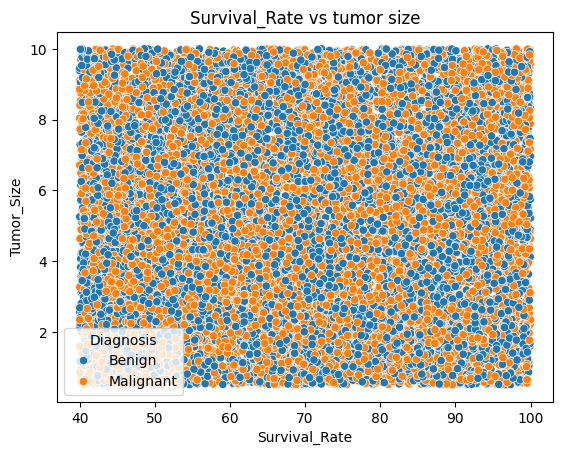

In [398]:
plt.title("Survival_Rate vs tumor size")
sns.scatterplot(df_plot,x="Survival_Rate",y = "Tumor_Size", hue="Diagnosis")

C:\Users\wilsen\AppData\Local\Temp\ipykernel_29748\3802667066.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df_plot.groupby("Age_Group")["Survival_Rate"].mean()).plot(kind = "bar")


<Axes: xlabel='Age_Group'>

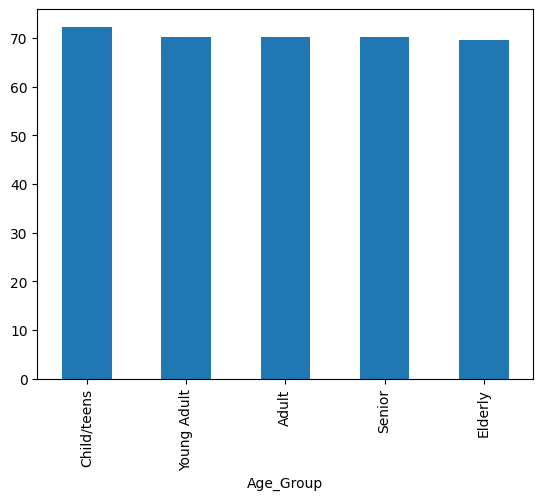

In [317]:
(df_plot.groupby("Age_Group")["Survival_Rate"].mean()).plot(kind = "bar")

Text(0.5, 1.0, 'tumor type survival rate')

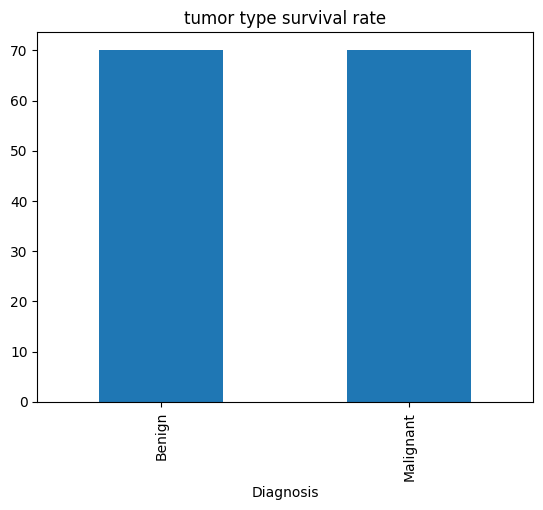

In [349]:
(df_plot.groupby("Diagnosis")["Survival_Rate"].mean()).plot(kind = "bar")
plt.title("tumor type survival rate")


<Axes: title={'center': 'hist dristribution'}, xlabel='Tumor_Growth_Rate', ylabel='Count'>

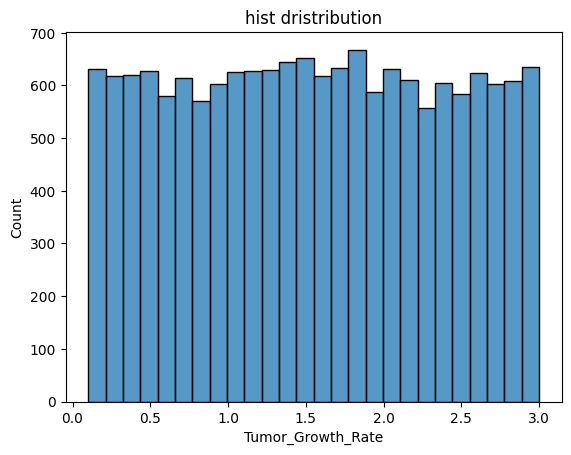

In [335]:
plt.title('hist dristribution')
sns.histplot(df_plot["Tumor_Growth_Rate"])

<Axes: xlabel='count', ylabel='Tumor_Growth_Rate_Group'>

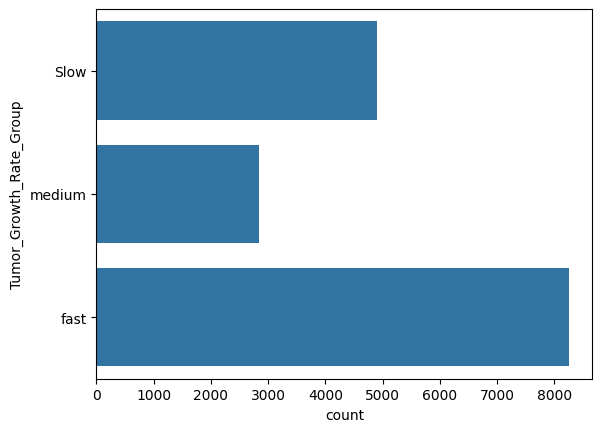

In [319]:
Surivival_rate = [0,1,1.5,3]
labels_survival = ["Slow","medium", "fast"]

df_plot["Tumor_Growth_Rate_Group"] = pd.cut(df_plot["Tumor_Growth_Rate"], labels=labels_survival,bins=Surivival_rate)

sns.countplot(df_plot["Tumor_Growth_Rate_Group"])

In [384]:
df_plot.groupby('Diagnosis')["Tumor_Growth_Rate"].mean()

Diagnosis
Benign       1.551569
Malignant    1.542311
Name: Tumor_Growth_Rate, dtype: float64

## Visualisasi Fitur Kategorikal

Text(0.5, 1.0, 'Lokasi tumor')

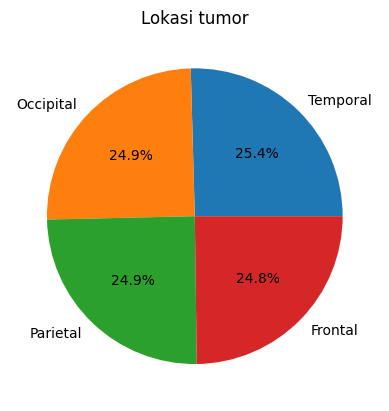

In [370]:
total_in_location = pd.DataFrame(df_plot["Location"].value_counts())
plt.pie(total_in_location["count"], labels= total_in_location.index, autopct="%1.1f%%")
plt.title("Lokasi tumor")

Text(0.5, 1.0, 'Lokasi tumor')

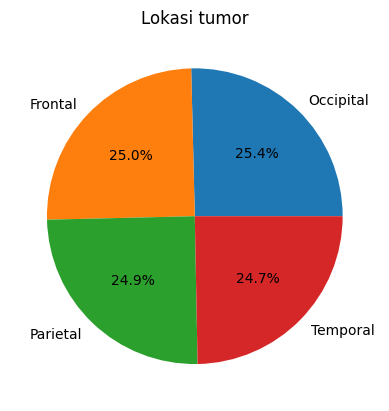

In [ ]:
total_in_location_b = pd.DataFrame(df_plot["Location"][df_plot["Diagnosis"] == "Benign"].value_counts())
plt.pie(total_in_location_b["count"], labels= total_in_location_b.index, autopct="%1.1f%%")
plt.title("Lokasi tumor Benign")

Text(0.5, 1.0, 'Lokasi tumor Malignant')

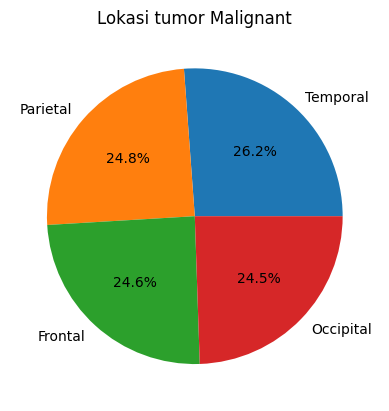

In [376]:
total_in_location_m = pd.DataFrame(df_plot["Location"][df_plot["Diagnosis"] == "Malignant"].value_counts())
plt.pie(total_in_location_m["count"], labels= total_in_location_m.index, autopct="%1.1f%%")
plt.title("Lokasi tumor Malignant")

Text(0.5, 1.0, 'Frekuensi Setiap Tipe Histologi')

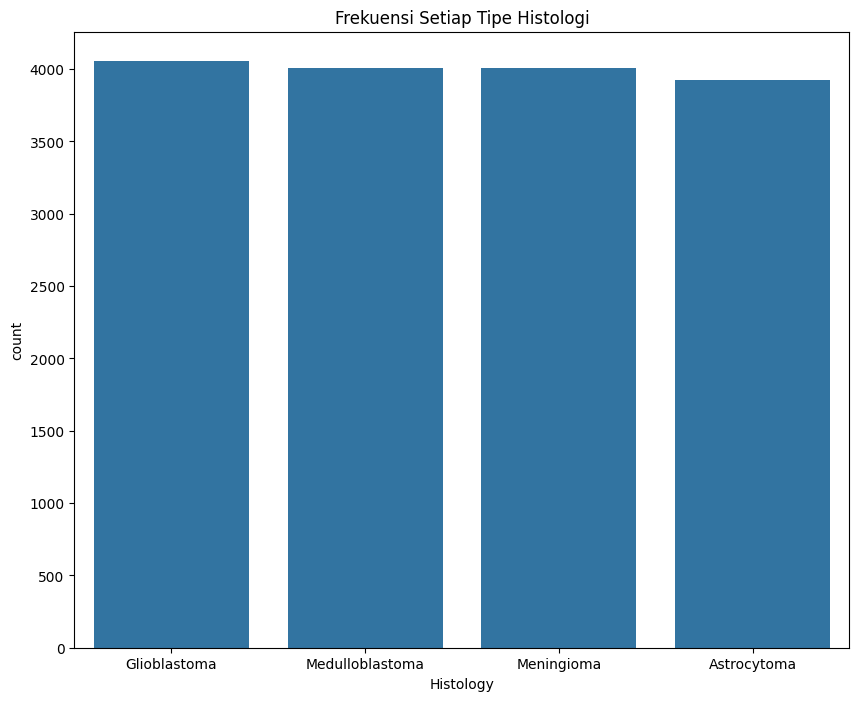

In [322]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Histology')
plt.title('Frekuensi Setiap Tipe Histologi')

Text(0.5, 1.0, 'Distribusi Stadium Tumor')

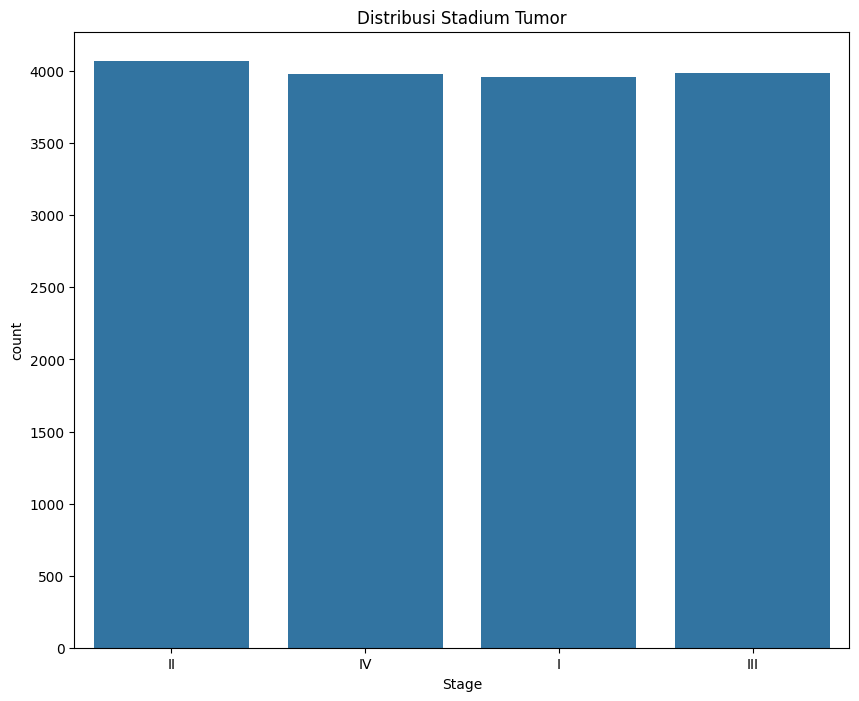

In [323]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Stage')
plt.title('Distribusi Stadium Tumor')

Text(0.5, 1.0, 'Distribusi Pasien Berdasarkan Terapi Radiasi')

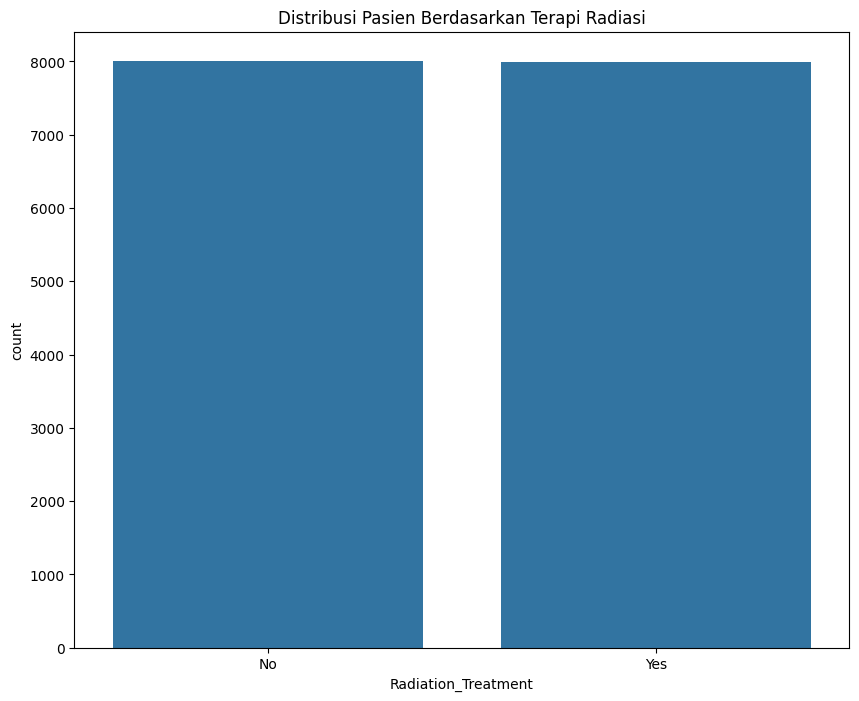

In [324]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Radiation_Treatment')
plt.title('Distribusi Pasien Berdasarkan Terapi Radiasi')

Text(0.5, 1.0, 'Persebaran Kategori Surgery Performed')

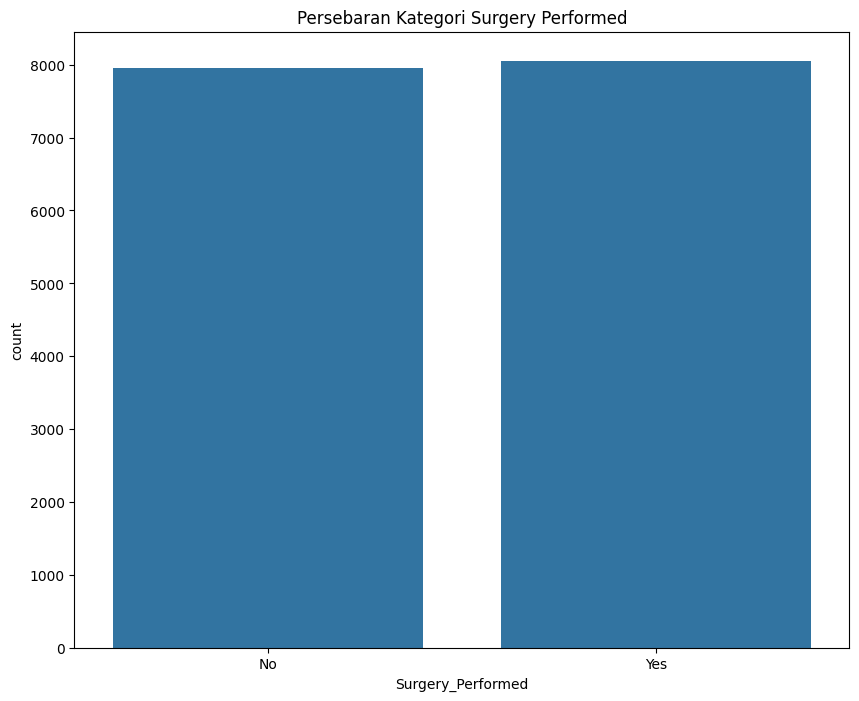

In [325]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Surgery_Performed')
plt.title('Persebaran Kategori Surgery Performed')

Text(0.5, 1.0, 'Distribusi Pasien Berdasarkan Kemoterapi')

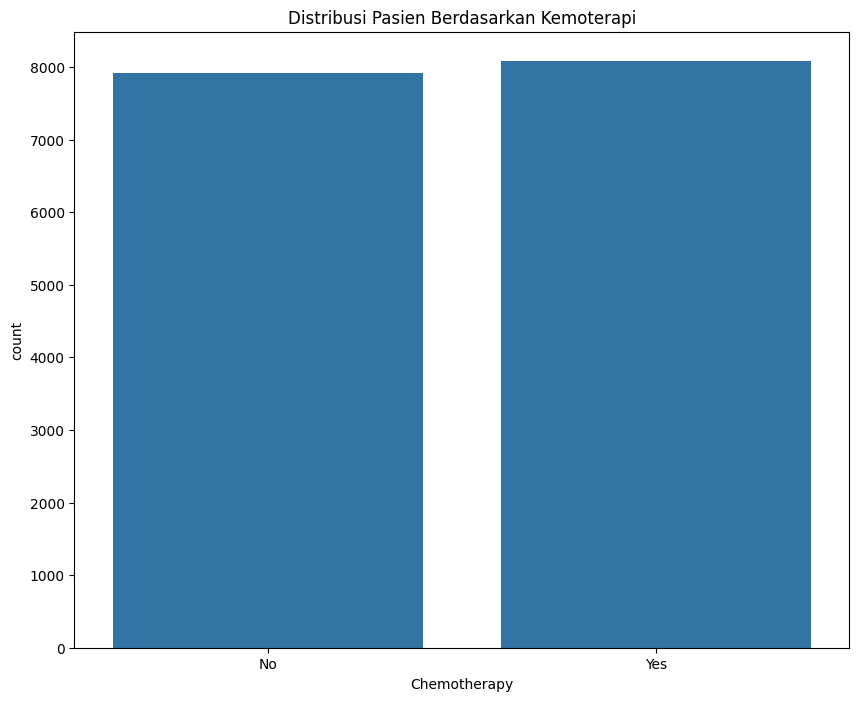

In [326]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Chemotherapy')
plt.title('Distribusi Pasien Berdasarkan Kemoterapi')

Text(0.5, 1.0, 'Frekuensi Riwayat Kanker dalam Keluarga')

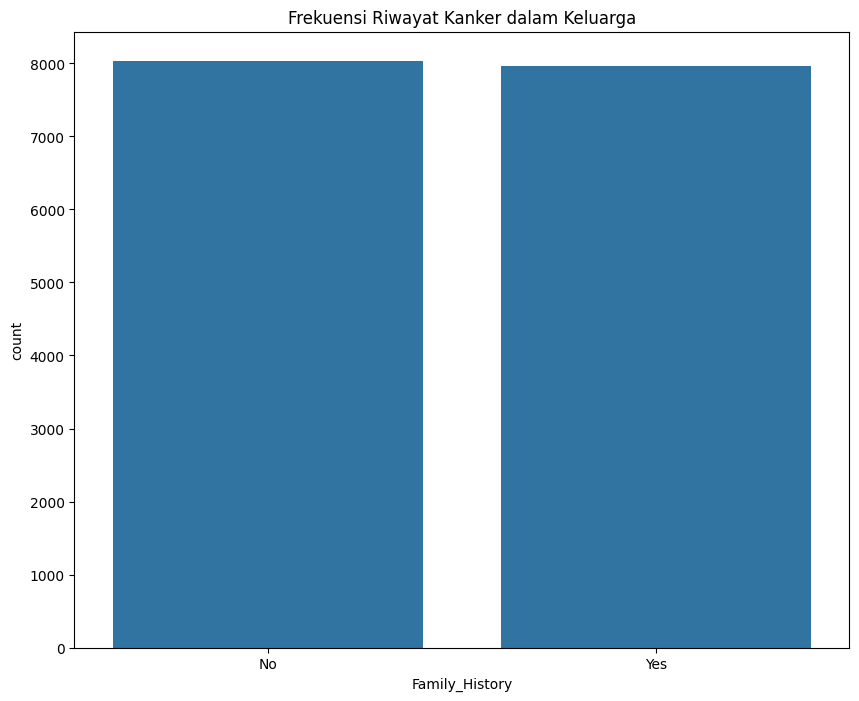

In [327]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Family_History')
plt.title('Frekuensi Riwayat Kanker dalam Keluarga')

Text(0.5, 1.0, 'Frekuensi Kategori MRI Result')

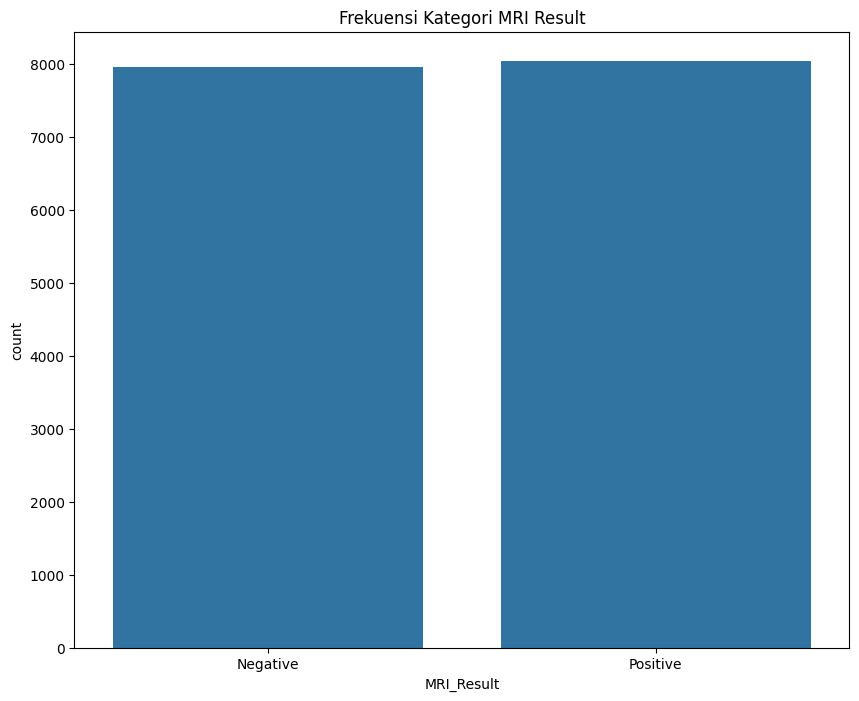

In [328]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='MRI_Result')
plt.title('Frekuensi Kategori MRI Result')

Text(0.5, 1.0, 'Frekuensi Follow-Up Pasien')

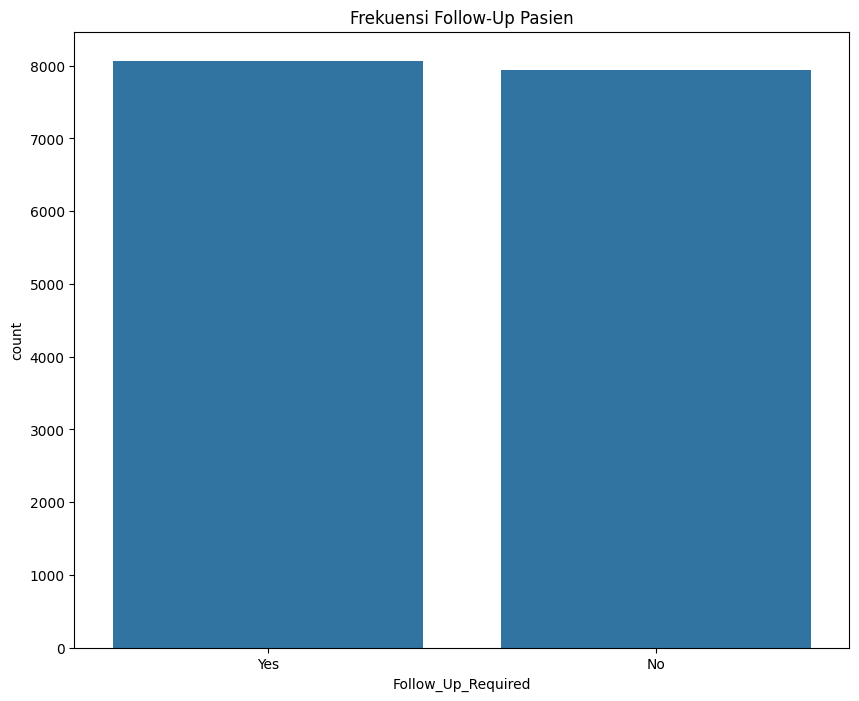

In [329]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Follow_Up_Required')
plt.title('Frekuensi Follow-Up Pasien')

Text(0.5, 1.0, 'Frekuensi Setiap Jenis Diagnosis')

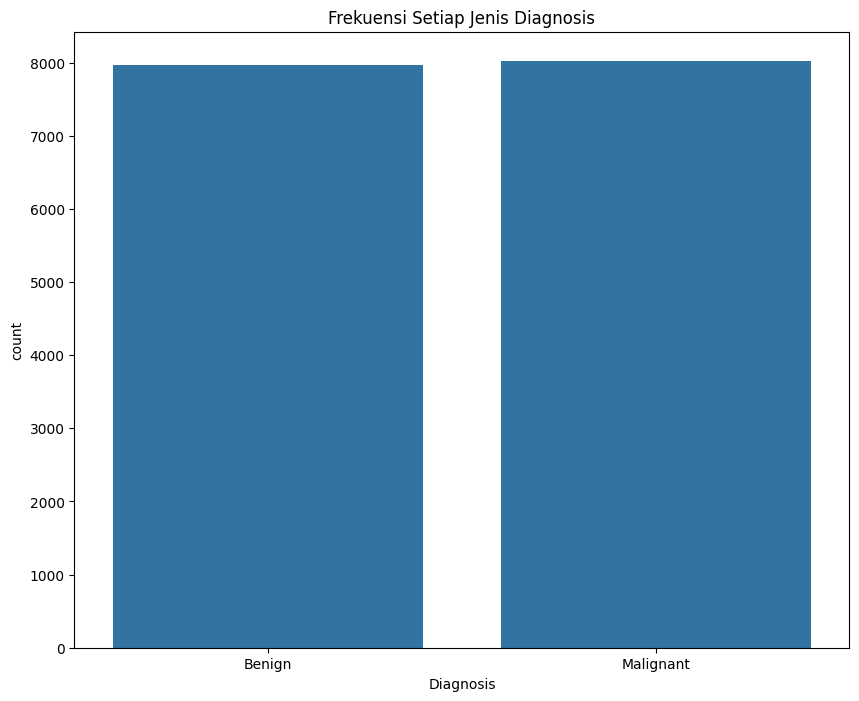

In [330]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Diagnosis')
plt.title('Frekuensi Setiap Jenis Diagnosis')

Text(0.5, 1.0, 'Distribusi Pasien Berdasarkan Gejala 1')

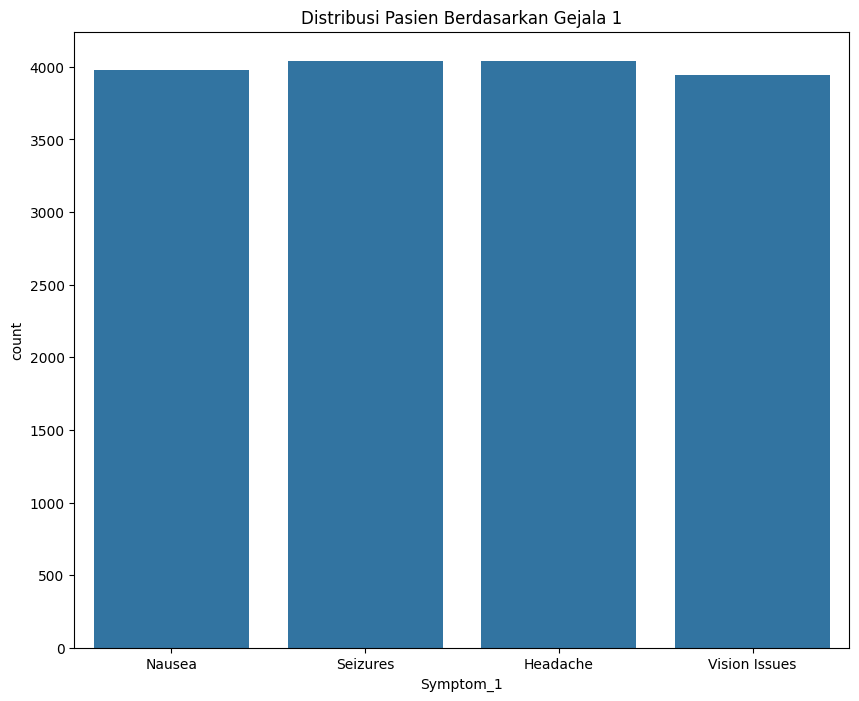

In [331]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Symptom_1')
plt.title('Distribusi Pasien Berdasarkan Gejala 1')

Text(0.5, 1.0, 'Distribusi Pasien Berdasarkan Gejala 2')

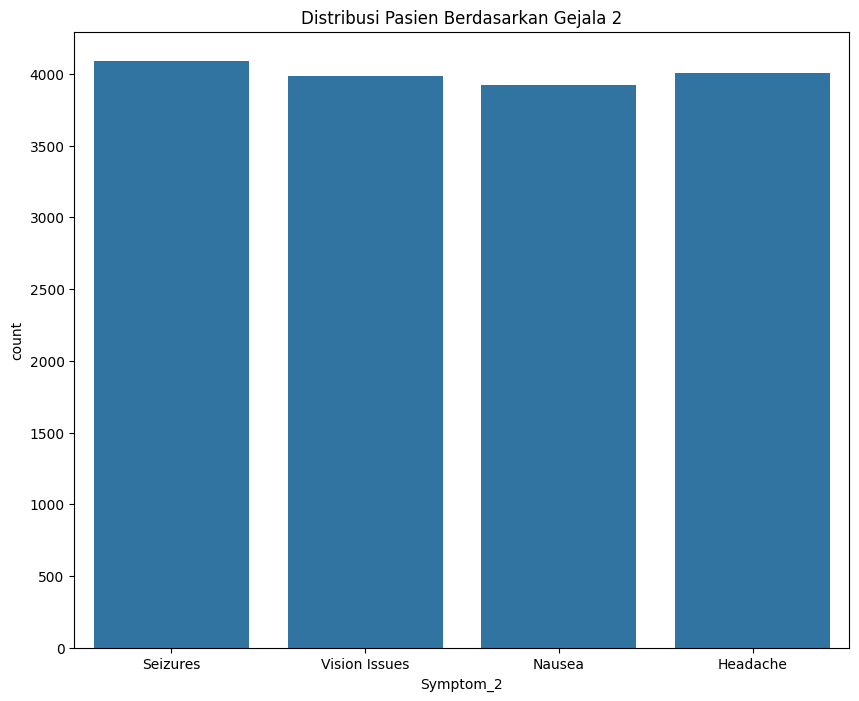

In [332]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Symptom_2')
plt.title('Distribusi Pasien Berdasarkan Gejala 2')

Text(0.5, 1.0, 'Distribusi Pasien Berdasarkan Gejala 3')

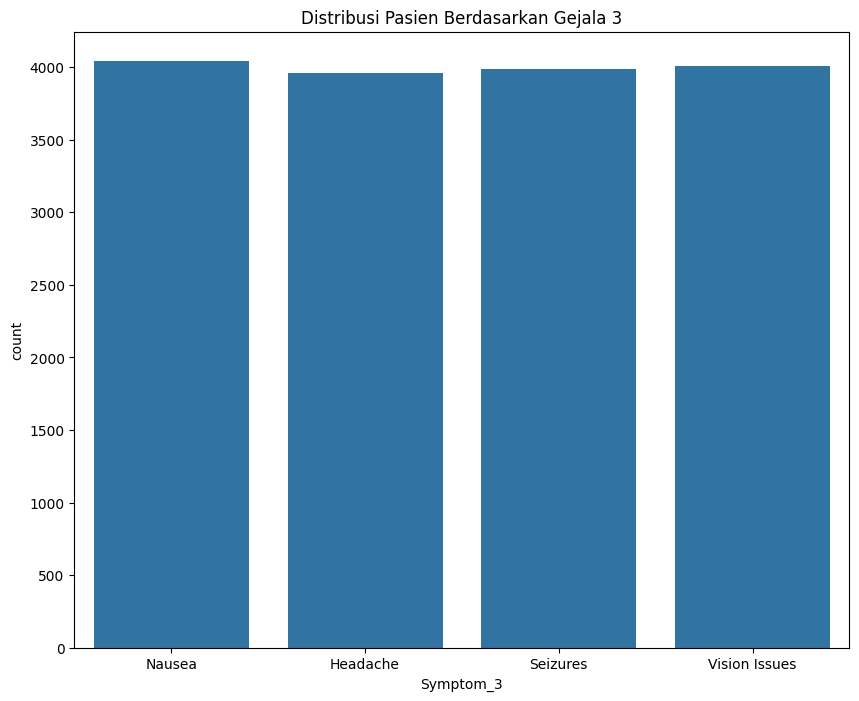

In [333]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Symptom_3')
plt.title('Distribusi Pasien Berdasarkan Gejala 3')

## Kesimpulan untuk distribusi setiap fitur
- Setelah dilakukan visualisasi untuk melihat distribusi setiap fitur kami dapati bahwa semua fitur memiliki **Distribusi Normal**.
- Tidak perlu melakukan Oversampling/Undersampling.

## Hubungan corelasi

<Axes: >

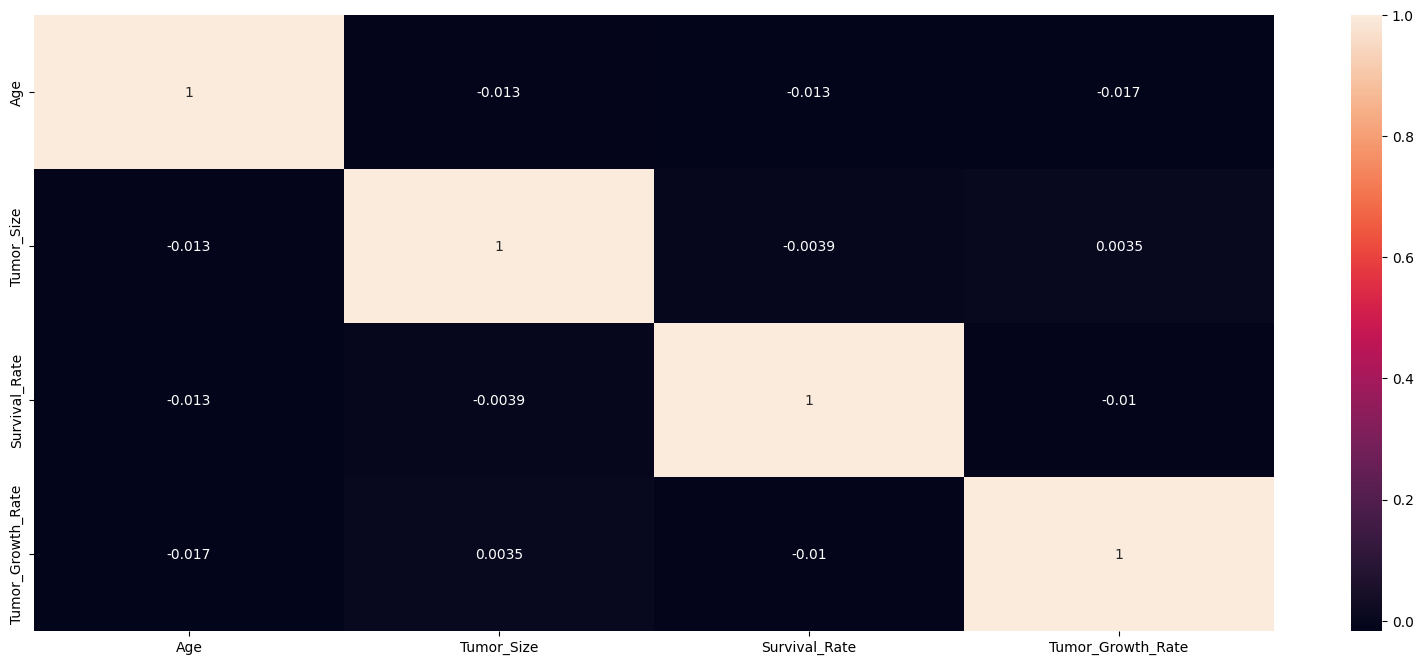

In [334]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_plot.corr(numeric_only=True), annot=True)